In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from useducation', con = engine)
engine.dispose()

In [4]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


 1.Determine all the variable types and find the fraction of the missing values for each variable.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [7]:
round(df.isnull().sum()*100/df.isnull().count(),2)

2.Notice that the data has a time dimension (year).  For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables.  For which variables would filling in the missing values with some value make sense?  For which might tossing out the records entirely make sense?

In [7]:
#????? why answer sheet didnt fill for 4 bottom column with around 65% empty????  
## this is because the missing percent is high hence these cols might not be useable. 
#??? because number of empty cells are greater than 50%, it is better to drop ???  
## yes if >50 % drop the column if cant be interpolated

In [8]:
# All empty columns are numeric so fill with average number:
df1 = df.copy()
filling_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]
for col in filling_list:
    df1.loc[:, col] = df1.loc[:, col].fillna(df1.loc[:, col].mean())

In [9]:
df1.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                            0
TOTAL_REVENUE                     0
FEDERAL_REVENUE                   0
STATE_REVENUE                     0
LOCAL_REVENUE                     0
TOTAL_EXPENDITURE                 0
INSTRUCTION_EXPENDITURE           0
SUPPORT_SERVICES_EXPENDITURE      0
OTHER_EXPENDITURE                 0
CAPITAL_OUTLAY_EXPENDITURE        0
GRADES_PK_G                       0
GRADES_KG_G                       0
GRADES_4_G                        0
GRADES_8_G                        0
GRADES_12_G                       0
GRADES_1_8_G                      0
GRADES_9_12_G                     0
GRADES_ALL_G                      0
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

3.Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [10]:
df2 = df.copy()

years = df2.YEAR.unique()

for col in filling_list:
    for year in years:
        df2.loc[df['YEAR'] == year, col] = df2.loc[df['YEAR'] == year, col].fillna(df2.loc[df['YEAR'] == year][col].mean())



4.This time, fill in the missing values using interpolation (extrapolation).

?????????? why have to use limit direction = both.  and why answer sheet didnt use fillna???   
Interploation can be forward, backward or both. 
In this case both is used. 

Fillna fills the NaN values with a given number with which you want to substitute. It gives you an option to fill according to the index of rows of a pd.DataFrame or on the name of the columns in the form of a python dict.

But interpolate gives you the flexibility to fill the missing values with many kinds of interpolations between the values like linear (which fillna does not provide). 

In [11]:
df3 = df.copy()

for col in filling_list:     
    df3.loc[:, col] = df3.loc[:, col].fillna(df3.loc[:, col].interpolate(limit_direction='both'))

5.Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

???why using concat ????  concat can be used for vertical stacking or horizontal stacking.
for better understanding??? what is axis=1??? 
axi1=1 -> appending more cols to make df wide 
axis=0 -> vertical stacking 

In [12]:
for col in filling_list:
    print ('Compare Satistical Result of fillin_list columns:{}'.format(col))
    print (pd.concat([df[col], df1[col], df2[col]],axis=1).describe())


Compare Satistical Result of fillin_list columns:ENROLL
             ENROLL        ENROLL        ENROLL
count  1.229000e+03  1.492000e+03  1.385000e+03
mean   9.159308e+05  9.159308e+05  9.161654e+05
std    1.065280e+06  9.667725e+05  1.003532e+06
min    4.386600e+04  4.386600e+04  4.386600e+04
25%    2.583140e+05  3.150940e+05  2.867590e+05
50%    6.483130e+05  8.204140e+05  7.374010e+05
75%    1.014528e+06  9.211780e+05  9.624880e+05
max    6.307022e+06  6.307022e+06  6.307022e+06
Compare Satistical Result of fillin_list columns:TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.492000e+03   1.441000e+03
mean    9.092082e+06   9.092082e+06   9.084108e+06
std     1.174519e+07   1.087818e+07   1.110204e+07
min     4.656500e+05   4.656500e+05   4.656500e+05
25%     2.186305e+06   2.546261e+06   2.425600e+06
50%     5.079546e+06   6.359310e+06   5.778507e+06
75%     1.085985e+07   9.276958e+06   1.116863e+07
max     8.921726e+07   8.921726e+07   8.9

          GRADES_8_G     GRADES_8_G     GRADES_8_G
count    1361.000000    1492.000000    1390.000000
mean    64271.057311   64271.057311   64331.744106
std     78910.545776   75364.301721   78083.976028
min       437.000000     437.000000     437.000000
25%     13342.000000   15682.750000   13698.250000
50%     43339.000000   49571.000000   44756.500000
75%     76566.000000   72131.000000   75016.250000
max    500143.000000  500143.000000  500143.000000
Compare Satistical Result of fillin_list columns:GRADES_12_G
        GRADES_12_G    GRADES_12_G    GRADES_12_G
count    1361.00000    1492.000000    1390.000000
mean    54268.92432   54268.924320   54418.075582
std     67889.27623   64838.328605   67187.337112
min       311.00000     311.000000     311.000000
25%     10919.00000   13437.000000   11161.750000
50%     36735.00000   39566.000000   37541.500000
75%     67460.00000   64616.250000   67026.000000
max    498403.00000  498403.000000  498403.000000
Compare Satistical Result of f

#??? is it ok use mean() or have to use median?? why answer sheet use median?? you can use either mean or median. 
yes default is meidan but if the distribution is fairly normal you can still use mean 

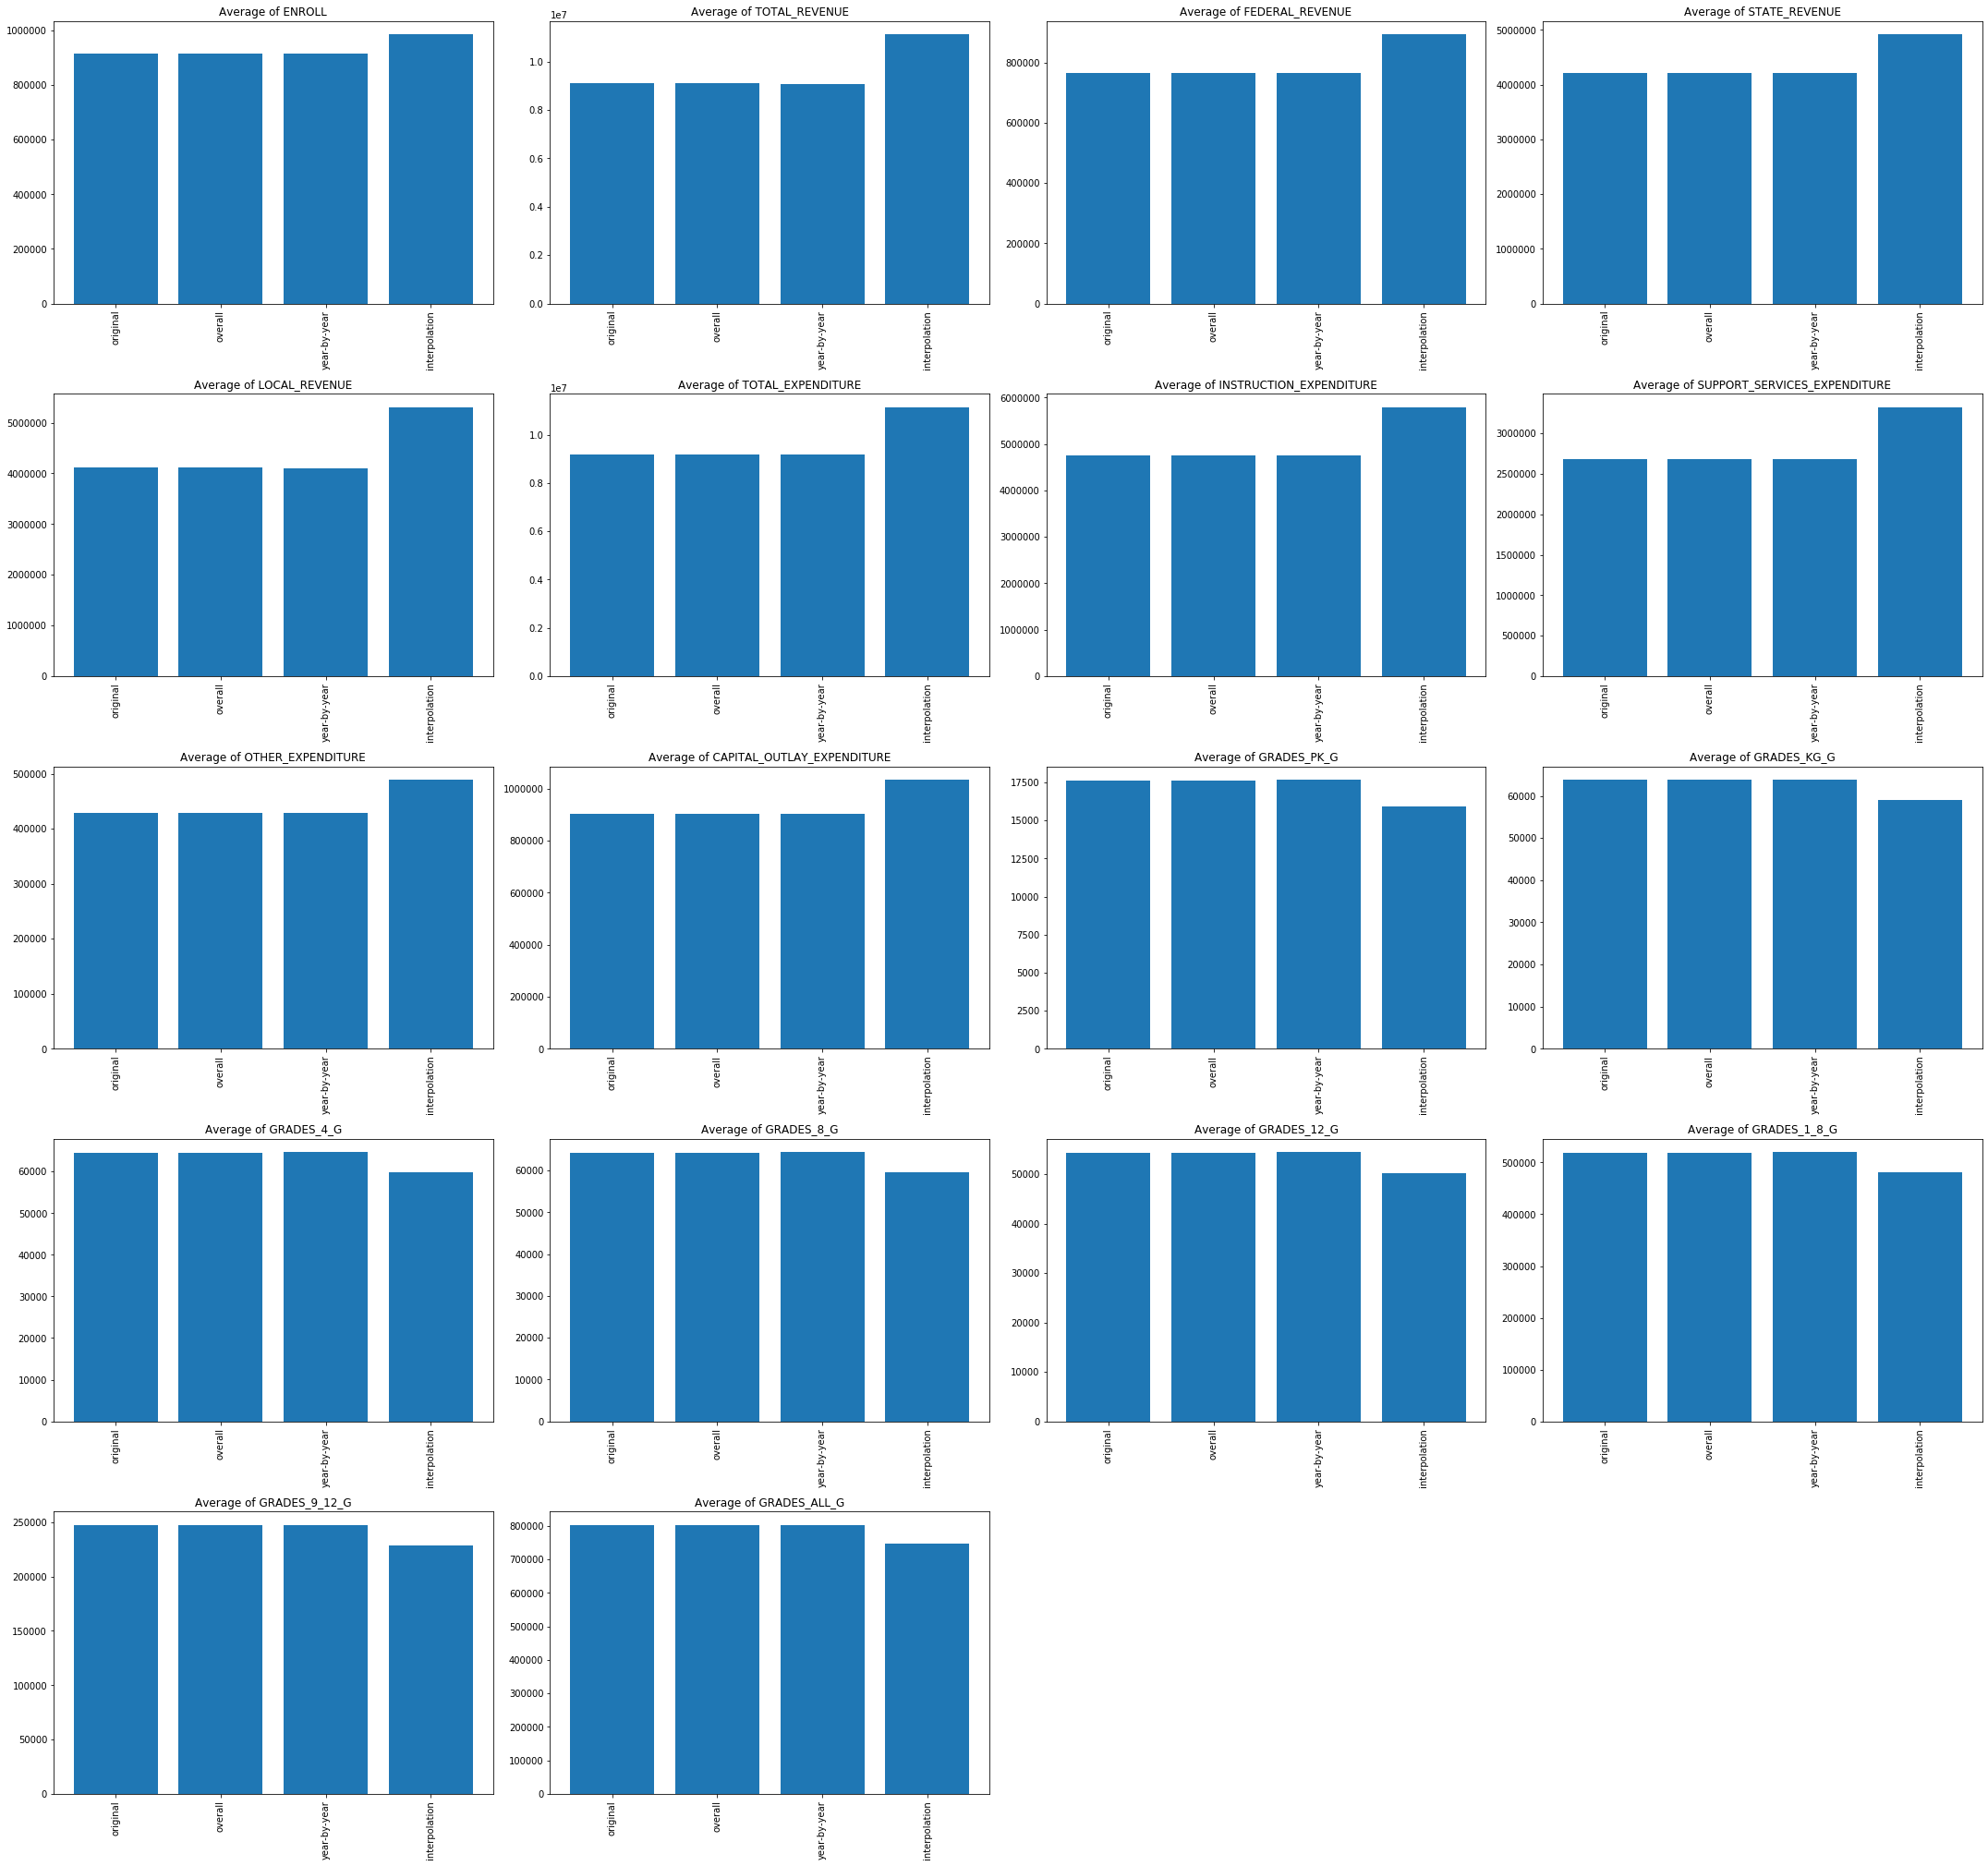

In [13]:
fig = plt.figure(figsize=(30,100))

for i, col in enumerate(filling_list):
    df4 = pd.concat([df[col], df1[col], df2[col], df3[col]], axis=1)
    
    plt.subplot(len(filling_list), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df4.mean())
    plt.xticks(rotation=90)
    plt.title("Average of {}".format(col))
    
plt.tight_layout()
plt.show()